1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [11]:
import numpy as np
from math import exp, factorial

# Number of hurricanes in 2005
num_hurricanes_2005 = 15
# Historical average number of hurricanes per year
avg_hurricanes = 6.3
# Significance level for hypothesis testing
significance_level = 0.022

def calculate_poisson_probability(k, avg):
    return exp(-avg) * avg**k / factorial(k)

def calculate_cumulative_poisson_probability(k, avg):
    cumulative_prob = 0
    for i in range(k + 1):
        cumulative_prob += calculate_poisson_probability(i, avg)
    return cumulative_prob

# Calculate the probability of observing more than 15 hurricanes
probability = 1 - calculate_cumulative_poisson_probability(14, avg_hurricanes)
print(f"Probability of observing more than 15 hurricanes: {probability:.4f}")

# Check if the probability is less than the significance level
is_significant = probability < significance_level
print(f"Is the number of hurricanes in 2005 significantly higher than the historical average? {'Yes' if is_significant else 'No'}")


Probability of observing more than 15 hurricanes: 0.0022
Is the number of hurricanes in 2005 significantly higher than the historical average? Yes


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [12]:
import numpy as np
from scipy import stats

# Pre-exposure systolic blood pressure
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
# Post-exposure systolic blood pressure
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

# Number of observations
n = len(pre)

# Means of the two datasets
mean_pre = np.mean(pre)
mean_post = np.mean(post)

# Standard deviations of the two datasets
std_pre = np.std(pre, ddof=1)
std_post = np.std(post, ddof=1)

# Calculate the pooled standard deviation
sigma = np.sqrt((std_pre**2 + std_post**2) / 2)

# Calculate the t statistic
t = (mean_pre - mean_post) / (sigma * np.sqrt(2/n))

# Calculate the degrees of freedom
df = 2*n - 2

# Calculate the p-value
p = 2 * stats.t.sf(np.abs(t), df)

print(f"t = {t:.3f}")
print(f"p = {p:.3f}")

# Check if the change in blood pressures is statistically significant
if p < 0.05:
    print("The change in blood pressures is statistically significant.")
else:
    print("The change in blood pressures is not statistically significant.")

t = -3.787
p = 0.001
The change in blood pressures is statistically significant.


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

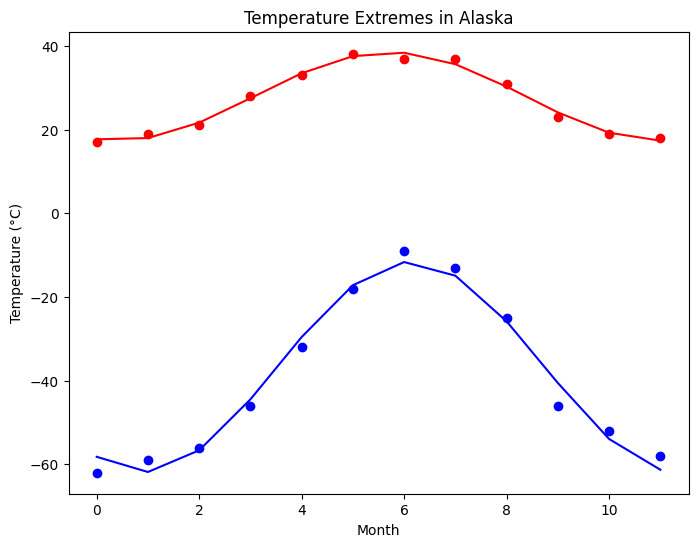

Time offset for max temperatures: 3.07
Time offset for min temperatures: 3.52


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# Monthly indices
months = np.arange(12)

# Temperature data
max_temp = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temp = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

# Sinusoidal function
def func(t, A, B, C, D):
    return A * np.sin(B * (t - C)) + D

# Curve fitting
params_max, params_cov_max = optimize.curve_fit(func, months, max_temp, [20, 0.4, 0, 20])
params_min, params_cov_min = optimize.curve_fit(func, months, min_temp, [-40, 0.4, 0, -40])

# Plotting the temperatures
plt.figure(figsize=(8,6))
plt.plot(months, max_temp, 'ro')
plt.plot(months, min_temp, 'bo')
plt.plot(months, func(months, *params_max), 'r-')
plt.plot(months, func(months, *params_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Extremes in Alaska')
plt.show()

# Check if the time offset for min and max temperatures is the same within the fit accuracy
print(f"Time offset for max temperatures: {params_max[2]:.2f}")
print(f"Time offset for min temperatures: {params_min[2]:.2f}")

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

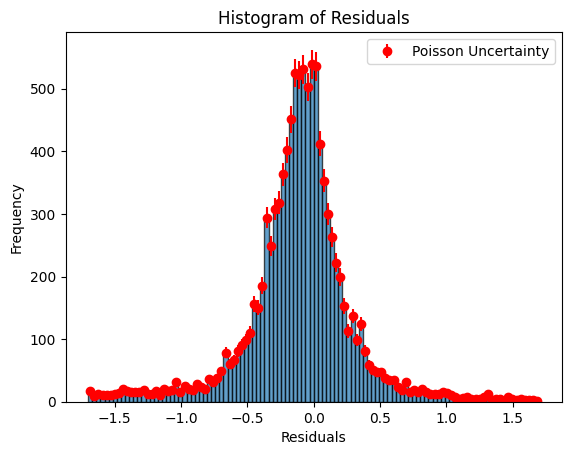

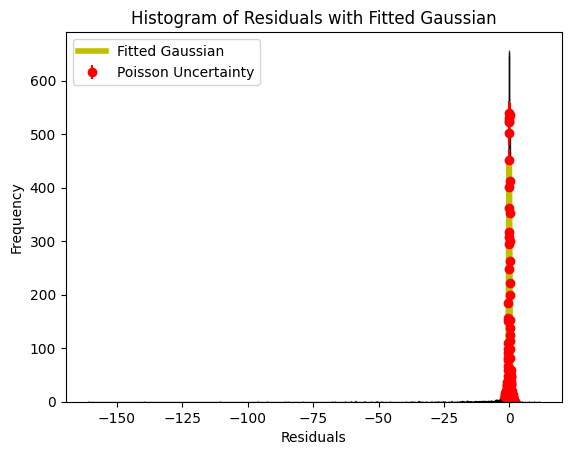

n degrees of freedom = 106
chi2 = 642.6978665592492
p-value = 0.0


In [14]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

def load_pickle_file(file_path):
    with open(file_path, 'rb') as infile:
        loaded_dict = pickle.load(infile)
    return loaded_dict

def create_filtered_dataframe(data_frame, max_residual_threshold=1.7):
    filtered_df = data_frame[data_frame['residuals'].abs() < max_residual_threshold]
    return filtered_df

def create_residuals_histogram(data_frame, bin_edges='auto'):
    residuals, bins_edges, _ = plt.hist(data_frame['residuals'], bins=bin_edges, edgecolor='black', alpha=0.7, range=(data_frame['residuals'].min(), data_frame['residuals'].max()))
    bin_centers = (bins_edges[:-1] + bins_edges[1:]) / 2
    errors = np.sqrt(np.abs(residuals))
    plt.errorbar(bin_centers, residuals, yerr=errors, fmt='o', color='r', label='Poisson Uncertainty')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Histogram of Residuals')
    plt.legend()
    plt.show()
    return residuals, bin_centers, errors

def gaussian_fit_function(x, sigma, mu, amplitude, offset):
    return amplitude * np.exp(-(((x - mu) / sigma) ** 2) / 2) + offset

def perform_gaussian_fit(bin_centers, residuals, errors):
    popt, pcov = curve_fit(gaussian_fit_function, bin_centers, residuals, sigma=errors)
    sigma, mu, amplitude, offset = popt
    sigma_err, mu_err, amplitude_err, offset_err = np.sqrt(np.diag(pcov))
    return popt, pcov

def plot_residuals_with_fit(bin_centers, residuals, errors, popt):
    plt.hist(df['residuals'], bins='auto', edgecolor='black', alpha=0.7, range=(df['residuals'].min(), df['residuals'].max()))
    plt.errorbar(bin_centers, residuals, yerr=errors, fmt='o', color='r', label='Poisson Uncertainty')
    plt.plot(bin_centers, gaussian_fit_function(bin_centers, *popt), color='y', linewidth=4, label='Fitted Gaussian')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Histogram of Residuals with Fitted Gaussian')
    plt.legend()
    plt.show()

def perform_goodness_of_fit_test(n, bin_centers, residuals, errors, popt):
    ndof = len(n) - len(popt)
    print(f"n degrees of freedom = {ndof}")
    chi2 = np.sum(((n - gaussian_fit_function(bin_centers, *popt)) ** 2) / (errors ** 2))
    print(f"chi2 = {chi2}")
    p_value = 1.0 - stats.chi2.cdf(chi2, ndof)
    print(f"p-value = {p_value}")

# Load the pickle file
filename = "residuals_261.pkl"
loaded_data = load_pickle_file(filename)

# Creation of the dataframe
df = pd.DataFrame(loaded_data.item())

# Filter and create histogram
filtered_df = create_filtered_dataframe(df)
residuals, bin_centers, errors = create_residuals_histogram(filtered_df)

# Gaussian fit
popt, pcov = perform_gaussian_fit(bin_centers, residuals, errors)

# Plot residuals with fitted Gaussian
plot_residuals_with_fit(bin_centers, residuals, errors, popt)

# Perform goodness-of-fit test
perform_goodness_of_fit_test(residuals, bin_centers, residuals, errors, popt)

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

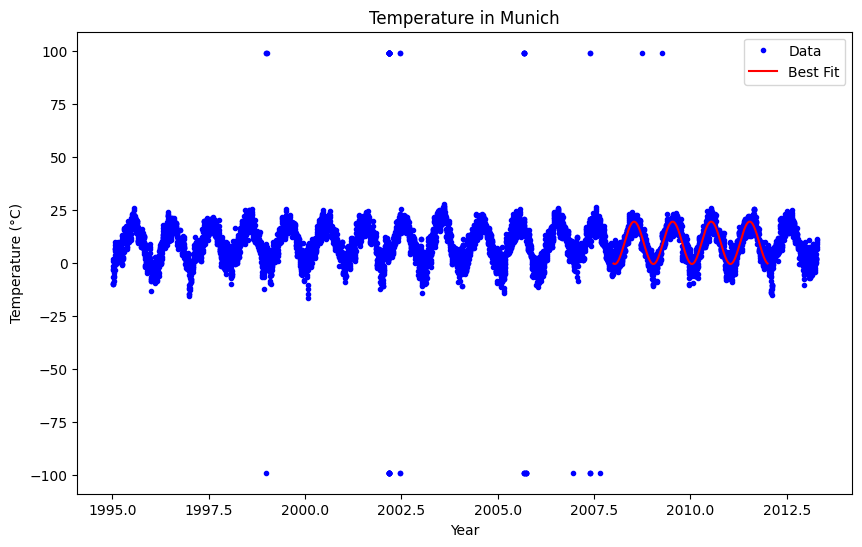

Overall average temperature in Munich: 8.94 °C
Predicted average temperature for the coldest time of year: -0.60 °C
Predicted average temperature for the hottest time of year: 19.37 °C


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the temperature data
data_file = "munich_temperatures_average_with_bad_data.txt"
data = np.loadtxt(data_file)

# Extract the year and temperature columns
year = data[:, 0]
temperature = data[:, 1]

# Define the function to fit
def func(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

# Select the data range for fitting
start_year = 2008
end_year = 2012
mask = (year >= start_year) & (year <= end_year)
fit_year = year[mask]
fit_temperature = temperature[mask]

# Perform the curve fitting
popt, pcov = curve_fit(func, fit_year, fit_temperature)

# Extract the best-fit values of the parameters and their uncertainties
a, b, c = popt
a_err, b_err, c_err = np.sqrt(np.diag(pcov))

# Plot the data and the best-fit model
plt.figure(figsize=(10, 6))
plt.plot(year, temperature, 'b.', label='Data')
plt.plot(fit_year, func(fit_year, a, b, c), 'r-', label='Best Fit')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Munich')
plt.legend()
plt.show()

# Calculate the overall average temperature
average_temperature = np.mean(temperature)
print(f"Overall average temperature in Munich: {average_temperature:.2f} °C")

# Calculate the predicted average temperatures for the coldest and hottest time of year
coldest_time = np.argmin(func(fit_year, a, b, c))
hottest_time = np.argmax(func(fit_year, a, b, c))
coldest_temperature = func(fit_year[coldest_time], a, b, c)
hottest_temperature = func(fit_year[hottest_time], a, b, c)
print(f"Predicted average temperature for the coldest time of year: {coldest_temperature:.2f} °C")
print(f"Predicted average temperature for the hottest time of year: {hottest_temperature:.2f} °C")

# The parameter b represents the phase shift of the cosine function
# It determines the time at which the cosine function reaches its maximum value
# In the context of temperature in Munich, it represents the time of the year when the temperature is at its highest
# A positive value of b indicates that the temperature reaches its maximum in the future, while a negative value indicates that it has already passed
